<a href="https://colab.research.google.com/github/sugam24/Coding-Neural-Networks-from-scratch/blob/main/Coding_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #Coding a neural network
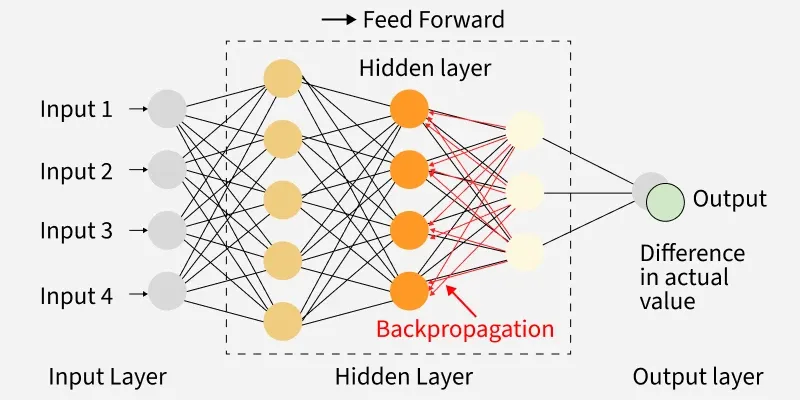

In [1]:
pip install nnfs

#Coding single layer of neuron

In [2]:
import numpy as np

inputs = [1, 2, 3, 4]

#dimension of weights matrix is: number of rows = number of neurons; number of columns = number of inputs
weights = [[0.1, 0.2, 0.3, 0.4],
           [0.3, 0.1, -0.2, -0.5],
           [0.3, 0.2, 0.33, -0.11]]

biases = [2.0, 3.0, 1.0]

#Let's convert python list into numpy arrays
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)

#Calculate the dot product and add the biases
layer_outputs = np.dot(weights_array, inputs_array) + biases_array
print(layer_outputs)

[5.   0.9  2.25]


#Need to take transpose of weight matrix(single layer of neuron)
When we have batch of input data, to make the matrix multiplication feasible, we need to take the transpose of weights matrix.

In [3]:
import numpy as np

inputs = [[1.0, 2.0, 3.0, 2.5],    #Three batches of input
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

#dimension of weights matrix is: number of rows = number of neurons; number of columns = number of inputs
weights = [[0.2, 0.8, -0.5, 1],         #[w11, w12, w13, w14]
           [0.5, -0.91, 0.26, -0.5],    #[w21, w22, w23, w24]
           [-0.26, -0.27, 0.17, 0.87]]  #[w31, w32, w33, w34]
biases = [2.0, 3.0, 0.5]

# Convert lists to numpy arrays
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)

# Calculate the dot product and add the biases
outputs = np.dot(inputs_array, weights_array.T) + biases_array
print(outputs)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


#Coding multiple layer of neurons (Two layers of batch):input, hidden, output

In [4]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

#dimension of weights matrix is: number of rows = number of neurons; number of columns = number of inputs
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

# Convert lists to numpy arrays
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)
weights2_array = np.array(weights2)
biases2_array = np.array(biases2)

# Calculate the output of the first layer
layer1_outputs = np.dot(inputs_array, weights_array.T) + biases_array

# Calculate the output of the second layer
layer2_outputs = np.dot(layer1_outputs, weights2_array.T) + biases2_array

print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


#Generating random spiral data as input

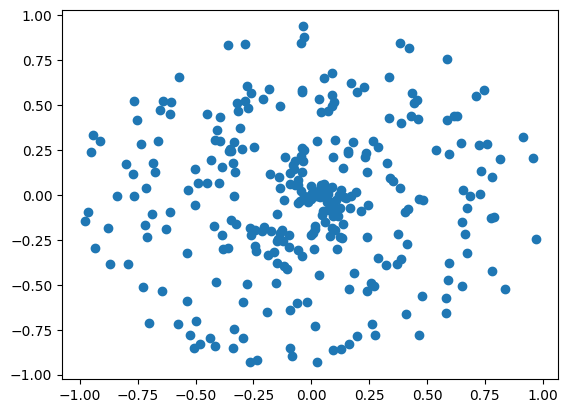

In [5]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:, 0], X[:, 1]) #X[:, 0] → [x1, x2, x3, ...] all rows, column 0; X[:, 1] → [y1, y2, y3, ...] all rows, column 1
plt.show()

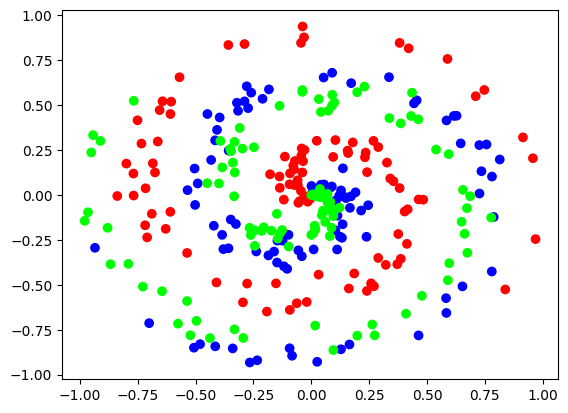

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = 'brg')
plt.show()

#Coding dense layer class

In [7]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

#Dense layer class
class Layer_Dense:
  #Defining layer initialization constructor
  def __init__(self, n_inputs, n_neurons):
    #Put weights in n_inputs, n_neurons format so that we don't need to transpose it later to save computation
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  #Forward pass
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print(dense1.output[:5])

[[ 0.          0.          0.        ]
 [-0.00104752  0.00113954 -0.00047984]
 [-0.00274148  0.00317292 -0.00086922]
 [-0.00421884  0.00526663 -0.00055913]
 [-0.00577077  0.00714014 -0.0008943 ]]


#Activation function ReLU

In [8]:
#This code shell demonstrates how ReLU works:
import numpy as np
inputs = [0, 2, -100, 9, -20, -50, 60]
output = np.maximum(0,inputs) #Choose 0 or input, whichever is the max so it discards negative output.
print(output)

[ 0  2  0  9  0  0 60]


In [9]:
#Coding ReLU activation class
class Activation_ReLU:
  #Forward pass
  def forward(self, inputs):
    self.output = np.maximum(0, inputs) #Calculates output values from input

#Activation function Softmax

In [10]:
inputs = [[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]]

exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) #here we subtract max values just to ensure that exp values won't be too large.
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) #exponential values divided by sum of exponential of that row
print(probabilities)
np.sum(probabilities, axis=1)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [11]:
#Coding softmax activation class
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

#Forward passing given neural network
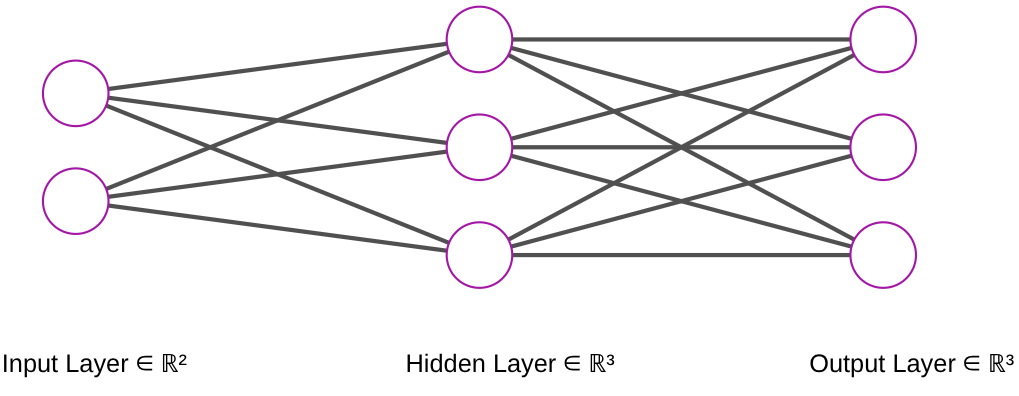

Coding a neural network with two inputs, one hidden layer with three neurons and one output layer with three neurons.

In [12]:
#Create dataset
X, y = spiral_data(samples = 100, classes=3)
#Creating Dense Layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3) #This codes input layer and hidden layer
#Creating ReLU activation function to apply to dense1 layer
activation1 = Activation_ReLU()
#Creating Dense Layer with 3 input features(as we have three neurons in hidden layer) and three output features
dense2 = Layer_Dense(3, 3) #This codes hidden layer and output layer
#Creating Softmax activation (to use with output layer)
activation2 = Activation_Softmax()

#Make forward pass of training data through hidden layer
dense1.forward(X)

#Make forward pass through ReLU activation function
activation1.forward(dense1.output)

#Make forward pass through second dense layer
dense2.forward(activation1.output)

#Make forward pass through Softmax activation function
activation2.forward(dense2.output)

#Printing first few outputs of output layer
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


#Cross entropy loss
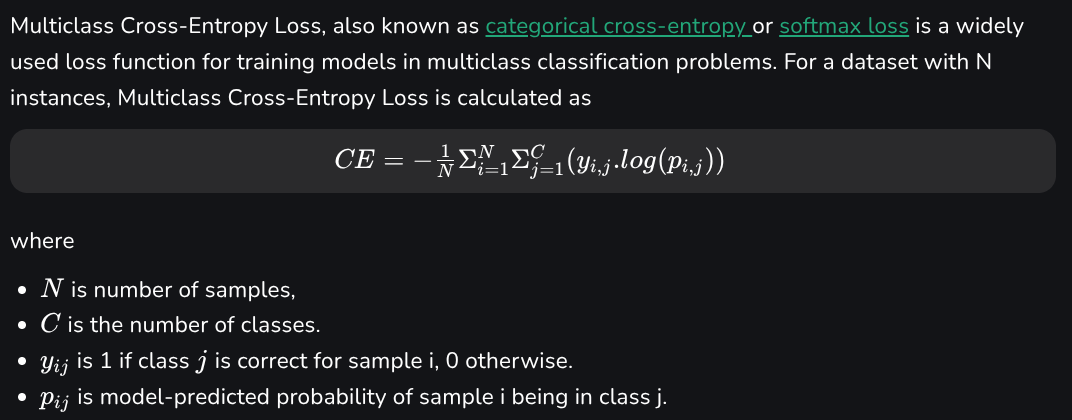

In [13]:
#Cross entropy loss building blocks
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
print(softmax_outputs[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [14]:
neg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
print(neg_loss)
average_loss = np.mean(neg_loss)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


If data is one hot encoded, to extract the relevant prediction we do this:

In [15]:
y_true_check = np.array([   #This is class target array
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

y_pred_clipped_check = np.array([  # This is prediction array
    [0.2, 0.7, 0.1],
    [0.8, 0.1, 0.1],
    [0.1, 0.2, 0.7]
])

A = y_true_check*y_pred_clipped_check
B = np.sum(A, axis = 1)
C = -np.log(B)
print(C)
print(np.mean(C))

[0.35667494 0.22314355 0.35667494]
0.3121644797305582


Implementing the loss class

In [16]:
#This is parent class
class Loss:
 def calculate(self, output, y):
  sample_losses = self.forward(output, y) #The array is returned from forward function
  data_loss = np.mean(sample_losses) #The mean loss is calculated
  return data_loss

In [17]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss): # Loss_CategoricalCrossentropy (child class) is inherited from loss (parent class)
 # Forward pass
 def forward(self, y_pred, y_true):
  # Number of samples in a batch
  samples = len(y_pred)

  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) #Data is clipped to prevent 0 and 1 as negative logarithm of them creates problem

  # Probabilities of target values in case of categorical levels
  if len(y_true.shape) == 1: # One dimension as not one hot encoded
   correct_confidences = y_pred_clipped[range(samples),y_true]

  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2: # Two dimension as it is one hot encoded
   correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

  negative_log_likelihoods = -np.log(correct_confidences) #loss array is calculated
  return negative_log_likelihoods

In [18]:
#This demonstrates working of above loss class
softmax_outputs = np.array([[0.7, 0.1, 0.2], # Predicted values
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0], # Actual values
 [0, 1, 0],
 [0, 1, 0]])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


Accuracy

In [19]:
import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666


#FULL CODE UPTO THIS POINT

In [20]:
#Create dataset
X, y = spiral_data(samples = 100, classes=3)
#Creating Dense Layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3) #This codes input layer and hidden layer
#Creating ReLU activation function to apply to dense1 layer
activation1 = Activation_ReLU()
#Creating Dense Layer with 3 input features(as we have three neurons in hidden layer) and three output features
dense2 = Layer_Dense(3, 3) #This codes hidden layer and output layer
#Creating Softmax activation (to use with output layer)
activation2 = Activation_Softmax()

#Make forward pass of training data through hidden layer
dense1.forward(X)

#Make forward pass through ReLU activation function
activation1.forward(dense1.output)

#Make forward pass through second dense layer
dense2.forward(activation1.output)

#Make forward pass through Softmax activation function
activation2.forward(dense2.output)

#Printing first few outputs of output layer
print(activation2.output[:5])

#Calculating loss
loss = loss_function.calculate(activation2.output, y)
print('Loss: ',loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33341435 0.33327004 0.3333156 ]
 [0.33349675 0.33320165 0.3333016 ]
 [0.33357966 0.33312857 0.3332918 ]
 [0.33361688 0.33311468 0.33326843]]
Loss:  1.0991496
acc: 0.31


#The Need for Optimization
As the weights and biases are randomly inatialiazed, the loss is higher(not closer to 0). So we look at two methods to optimize the loss function by adjusting the weights and bias properly. Let's think now as we are in the time when back propagation was not discovered. So, let's take help of the forward pass technique only to optimize the weights and bias leading to minimization of loss function.

> **Method 1: Randomly select weights/biases**


> **Method 2: Randomly adjust weights/biases**

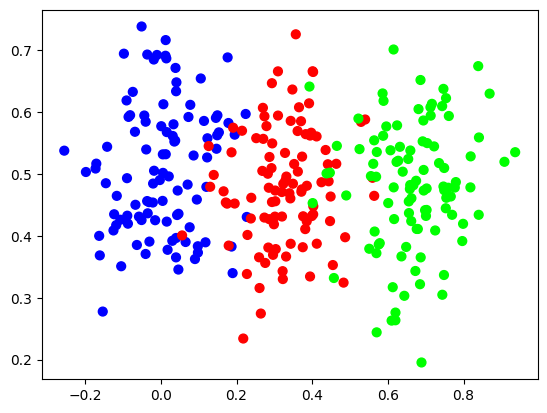

In [21]:
# Let's take simple vertical dataset instead of spiral dataset to make things simpler.
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()


> *STRATEGY 1: RANDOMLY SELECT WEIGHTS AND BIASES (VERTICAL DATASET) - DOES NOT WORK!*



In [22]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
 # Generate a new set of weights for iteration
 dense1.weights = 0.05 * np.random.randn(2, 3)
 dense1.biases = 0.05 * np.random.randn(1, 3)
 dense2.weights = 0.05 * np.random.randn(3, 3)
 dense2.biases = 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of the training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
   print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
   best_dense1_weights = dense1.weights.copy()
   best_dense1_biases = dense1.biases.copy()
   best_dense2_weights = dense2.weights.copy()
   best_dense2_biases = dense2.biases.copy()
   lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 acc: 0.3333333333333333




> STRATEGY 2: RANDOMLY ADJUST WEIGHTS AND BIASES (VERTICAL DATASET) - WORKS!



In [23]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1050142 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.1018766 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0984672 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0966852 acc: 0.3333333333333333
New set of weights found, iteration: 16 loss: 1.0929381 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0901707 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.089363 acc: 0.48333333333333334
New set of weights found, iteration: 25 loss: 1.0893046 acc: 0.46
New set of weights found, iteration: 28 loss: 1.0884042 acc: 0.6333333333333333
New set of weights found, iteration: 35 loss: 1.0877688 acc: 0.61
New set of weights found, iteration: 37 loss: 1.0864044 acc: 0.48
New set of weights found, iteration: 40 loss: 1.0795572 acc: 0.35
New set of weights found, iteration: 44 loss: 1.0791477 acc: 0.4033333333333333
New set of weights 



> STRATEGY 2: FOR SPIRAL DATASET - DOES NOT WORK!



In [24]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0985677 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0983883 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0980636 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0976781 acc: 0.35
New set of weights found, iteration: 23 loss: 1.0970553 acc: 0.36666666666666664
New set of weights found, iteration: 27 loss: 1.0963804 acc: 0.38333333333333336
New set of weights found, iteration: 33 loss: 1.0959606 acc: 0.34
New set of weights found, iteration: 37 loss: 1.0958799 acc: 0.37666666666666665
New set of weights found, iteration: 40 loss: 1.0938349 acc: 0.4
New set of weights found, iteration: 41 loss: 1.0936847 acc: 0.34
New set of weights found, iteration: 44 loss: 1.0930842 acc: 0.37
New set of weights found, iteration: 58 loss: 1.0913323 acc: 0.3466666666666667
New set of weights found, iteration: 60 loss: 1.0901752 acc: 0.4066666666666667
New set of weights found, itera